In [887]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [888]:
df = pd.read_csv('Dataset.csv',low_memory=False)
df.head(10)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,0.672619,0.02,0.375000,C2,"27003""",1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,0,A,M1,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,0.900277,0.11,0.432692,C4,"21622""",1,0,C1,M2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,0,A,M3,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
5,ID00006,1.018709,0.07,0.519231,C6,"13051""",3,0,C2,M4,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,0,B2,M5,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5
7,ID00008,0.509085,0.14,0.423077,C8,"8794""",1,0,B2,M6,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,0,C2,M4,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,0,B2,M7,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0


In [889]:
df['is_claim'].value_counts()

is_claim
0    28171
1     1929
Name: count, dtype: int64

In [890]:
from sklearn.utils import resample
# Separate the majority and minority classes
majority_class = df[df['is_claim'] == 0]
minority_class = df[df['is_claim'] == 1]

# Undersample the majority class
undersampled_majority = resample(
    majority_class,
    replace=False,  # Set to False for undersampling
    n_samples=len(minority_class)*2,  # Desired number of records in the majority class
    random_state=56  # Set a random seed for reproducibility
)

# Combine the undersampled majority class with the minority class
df = pd.concat([undersampled_majority, minority_class])

In [891]:
df['is_claim'].value_counts()

is_claim
0    3858
1    1929
Name: count, dtype: int64

In [892]:
df['population_density'].value_counts()

population_density
8794      1406
27003      760
34738      682
4076       636
7788       365
5410       311
73430      269
17804      253
6112       192
34791      154
4990       138
6108       112
27742       90
13051       89
21622       88
290         77
65567       39
16206       33
3264        29
35036       26
16733       26
20905        9
27003_       2
8794"        1
Name: count, dtype: int64

In [893]:
# removing impure values

l= ['27003_','27003"','8794"','34738_','73430_','16206_','4076_',
    '4076"','13051"','21622"','5410"','6108"']
for val in l:
    condition = (df['population_density'] == val );
    df = df[~condition]
df['population_density'].value_counts()


population_density
8794     1406
27003     760
34738     682
4076      636
7788      365
5410      311
73430     269
17804     253
6112      192
34791     154
4990      138
6108      112
27742      90
13051      89
21622      88
290        77
65567      39
16206      33
3264       29
35036      26
16733      26
20905       9
Name: count, dtype: int64

In [894]:
df['max_torque'].value_counts()

max_torque
113Nm@4400rpm     1766
60Nm@3500rpm      1459
250Nm@2750rpm     1401
82.1Nm@3400rpm     412
91Nm@4250rpm       231
200Nm@1750rpm      206
200Nm@3000rpm      155
85Nm@3000rpm       125
170Nm@4000rpm       29
Name: count, dtype: int64

In [895]:
df['area_cluster']

19561     C2
9890      C8
4907     C11
27686     C2
15047     C8
        ... 
29959     C7
29971     C2
30023    C12
30048    C22
30074     C3
Name: area_cluster, Length: 5784, dtype: object

In [896]:
df.describe()


,policy_tenure,age_of_car,age_of_policyholder,make,is_claim,airbags,displacement,cylinder,gear_box,turning_radius,height,ncap_rating
count,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000,5784.000000
mean,0.646117,0.067834,0.468785,1.762275,0.333333,3.159578,1164.211272,3.631570,5.247234,4.853899,1553.938451,1.755014
std,0.412459,0.055640,0.123654,1.133195,0.471445,1.844542,265.981839,0.482421,0.431441,0.228508,80.101637,1.385297
min,0.002748,0.000000,0.288462,1.000000,0.000000,1.000000,796.000000,3.000000,5.000000,4.500000,1475.000000,0.000000
25%,0.245343,0.020000,0.365385,1.000000,0.000000,2.000000,796.000000,3.000000,5.000000,4.600000,1475.000000,0.000000
50%,0.631690,0.060000,0.451923,1.000000,0.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,1530.000000,2.000000
75%,1.057838,0.110000,0.548077,3.000000,1.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,1635.000000,3.000000
max,1.335945,0.420000,0.951923,5.000000,1.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,1825.000000,5.000000


In [897]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5784 entries, 19561 to 30074
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         5784 non-null   object 
 1   policy_tenure                     5784 non-null   float64
 2   age_of_car                        5784 non-null   float64
 3   age_of_policyholder               5784 non-null   float64
 4   area_cluster                      5784 non-null   object 
 5   population_density                5784 non-null   object 
 6   make                              5784 non-null   int64  
 7   is_claim                          5784 non-null   int64  
 8   segment                           5784 non-null   object 
 9   model                             5784 non-null   object 
 10  fuel_type                         5784 non-null   object 
 11  max_torque                        5784 non-null   object 
 12  max_po

In [898]:
df.columns


Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'is_claim', 'segment',
       'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'Length', 'width', 'height',
       'Gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [899]:
df['max_torque'].value_counts()

max_torque
113Nm@4400rpm     1766
60Nm@3500rpm      1459
250Nm@2750rpm     1401
82.1Nm@3400rpm     412
91Nm@4250rpm       231
200Nm@1750rpm      206
200Nm@3000rpm      155
85Nm@3000rpm       125
170Nm@4000rpm       29
Name: count, dtype: int64

In [900]:
import re
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']
df['torque to rpm ratio']

19561    0.017143
9890     0.090909
4907     0.025682
27686    0.024147
15047    0.025682
           ...   
29959    0.017143
29971    0.090909
30023    0.025682
30048    0.025682
30074    0.017143
Name: torque to rpm ratio, Length: 5784, dtype: float64

In [901]:
df['max_power'].value_counts()

max_power
88.50bhp@6000rpm     1766
40.36bhp@6000rpm     1459
113.45bhp@4000rpm    1401
55.92bhp@5300rpm      412
67.06bhp@5500rpm      231
97.89bhp@3600rpm      206
88.77bhp@4000rpm      155
61.68bhp@6000rpm      125
118.36bhp@5500rpm      29
Name: count, dtype: int64

In [902]:
import re
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm1'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm1'] = pd.to_numeric(df['rpm1'])

# Calculate torque to RPM ratio 
df['power to rpm ratio'] = df['power'] / df['rpm1']
df['power to rpm ratio']

19561    0.006727
9890     0.028363
4907     0.014750
27686    0.010551
15047    0.014750
           ...   
29959    0.006727
29971    0.028363
30023    0.014750
30048    0.014750
30074    0.006727
Name: power to rpm ratio, Length: 5784, dtype: float64

In [903]:
df


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,is_claim,segment,model,...,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,torque,rpm,torque to rpm ratio,power,rpm1,power to rpm ratio
19561,ID19562,0.137155,0.01,0.759615,C2,27003,1,0,A,M1,...,No,No,Yes,0,60.0,3500,0.017143,40.36,6000,0.006727
9890,ID09891,0.580344,0.11,0.355769,C8,8794,3,0,C2,M4,...,No,Yes,Yes,3,250.0,2750,0.090909,113.45,4000,0.028363
4907,ID04908,1.048409,0.04,0.644231,C11,6108,1,0,B2,M7,...,Yes,Yes,Yes,0,113.0,4400,0.025682,88.50,6000,0.014750
27686,ID27687,0.081415,0.02,0.346154,C2,27003,1,0,B1,M8,...,No,Yes,Yes,2,82.1,3400,0.024147,55.92,5300,0.010551
15047,ID15048,1.144764,0.11,0.432692,C8,8794,1,0,B2,M6,...,Yes,Yes,Yes,2,113.0,4400,0.025682,88.50,6000,0.014750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29959,ID29960,0.522648,0.00,0.432692,C7,6112,1,1,A,M1,...,No,No,Yes,0,60.0,3500,0.017143,40.36,6000,0.006727
29971,ID29972,0.998589,0.08,0.528846,C2,27003,3,1,C2,M4,...,No,Yes,Yes,3,250.0,2750,0.090909,113.45,4000,0.028363
30023,ID30024,0.795711,0.11,0.336538,C12,34791,1,1,B2,M6,...,Yes,Yes,Yes,2,113.0,4400,0.025682,88.50,6000,0.014750
30048,ID30049,1.173214,0.04,0.346154,C22,16733,1,1,B2,M6,...,Yes,Yes,Yes,2,113.0,4400,0.025682,88.50,6000,0.014750


In [904]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'is_claim', 'segment',
       'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'Length', 'width', 'height',
       'Gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'torque', 'rpm',
       'torque to rpm ratio', 'power', 'rpm1', 'power to rpm ratio'],
      dtype='object')

In [905]:
df = pd.DataFrame(df)
def remove_units(value):
    return value.replace('(mm)','').replace("KG",'')

df['Length'] = df['Length'].apply(remove_units)
df['width'] = df['width'].apply(remove_units)
df['Gross_weight'] = df['Gross_weight'].apply(remove_units)

## one hot encoding

In [906]:
data = pd.DataFrame(df['fuel_type'])
df= pd.get_dummies(df,columns=['fuel_type'],prefix='fuel_type',dtype=int)
data = pd.DataFrame(df['model'])
df= pd.get_dummies(df,columns=['model'],prefix='model',dtype=int)
data = pd.DataFrame(df['rear_brakes_type'])
df= pd.get_dummies(df,columns=['rear_brakes_type'],prefix='rear_brakes_type',dtype=int)
data = pd.DataFrame(df['transmission_type'])
df= pd.get_dummies(df,columns=['transmission_type'],prefix='transmission_type',dtype=int)
data = pd.DataFrame(df['steering_type'])
df= pd.get_dummies(df,columns=['steering_type'],prefix='steering_type',dtype=int)
data = pd.DataFrame(df['segment'])
df= pd.get_dummies(df,columns=['segment'],prefix='segment',dtype=int)
data = pd.DataFrame(df['engine_type'])
df= pd.get_dummies(df,columns=['engine_type'],prefix='engine_type',dtype=int)
data = pd.DataFrame(df['area_cluster'])
df= pd.get_dummies(df,columns=['area_cluster'],prefix='area_cluster',dtype=int)
df


,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,is_claim,max_torque,max_power,airbags,...,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
19561,ID19562,0.137155,0.01,0.759615,27003,1,0,60Nm@3500rpm,40.36bhp@6000rpm,2,...,0,0,0,0,0,0,0,0,0,0
9890,ID09891,0.580344,0.11,0.355769,8794,3,0,250Nm@2750rpm,113.45bhp@4000rpm,6,...,0,0,0,0,0,0,0,0,1,0
4907,ID04908,1.048409,0.04,0.644231,6108,1,0,113Nm@4400rpm,88.50bhp@6000rpm,6,...,0,0,0,0,0,0,0,0,0,0
27686,ID27687,0.081415,0.02,0.346154,27003,1,0,82.1Nm@3400rpm,55.92bhp@5300rpm,2,...,0,0,0,0,0,0,0,0,0,0
15047,ID15048,1.144764,0.11,0.432692,8794,1,0,113Nm@4400rpm,88.50bhp@6000rpm,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29959,ID29960,0.522648,0.00,0.432692,6112,1,1,60Nm@3500rpm,40.36bhp@6000rpm,2,...,0,0,0,0,0,0,0,1,0,0
29971,ID29972,0.998589,0.08,0.528846,27003,3,1,250Nm@2750rpm,113.45bhp@4000rpm,6,...,0,0,0,0,0,0,0,0,0,0
30023,ID30024,0.795711,0.11,0.336538,34791,1,1,113Nm@4400rpm,88.50bhp@6000rpm,2,...,0,0,0,0,0,0,0,0,0,0
30048,ID30049,1.173214,0.04,0.346154,16733,1,1,113Nm@4400rpm,88.50bhp@6000rpm,2,...,0,0,1,0,0,0,0,0,0,0


In [907]:
df.columns


Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'is_claim', 'max_torque', 'max_power',
       'airbags',
       ...
       'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C22',
       'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5',
       'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8',
       'area_cluster_C9'],
      dtype='object', length=102)

In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5784 entries, 19561 to 30074
Columns: 102 entries, policy_id to area_cluster_C9
dtypes: float64(8), int64(70), object(24)
memory usage: 4.5+ MB


In [909]:
df.drop(['policy_id','max_torque','max_power'],inplace=True,axis=1)
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,is_claim,airbags,is_esc,is_adjustable_steering,is_tpms,...,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
19561,0.137155,0.01,0.759615,27003,1,0,2,No,No,No,...,0,0,0,0,0,0,0,0,0,0
9890,0.580344,0.11,0.355769,8794,3,0,6,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,1,0
4907,1.048409,0.04,0.644231,6108,1,0,6,Yes,Yes,No,...,0,0,0,0,0,0,0,0,0,0
27686,0.081415,0.02,0.346154,27003,1,0,2,No,No,No,...,0,0,0,0,0,0,0,0,0,0
15047,1.144764,0.11,0.432692,8794,1,0,2,No,Yes,No,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29959,0.522648,0.00,0.432692,6112,1,1,2,No,No,No,...,0,0,0,0,0,0,0,1,0,0
29971,0.998589,0.08,0.528846,27003,3,1,6,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
30023,0.795711,0.11,0.336538,34791,1,1,2,No,Yes,No,...,0,0,0,0,0,0,0,0,0,0
30048,1.173214,0.04,0.346154,16733,1,1,2,No,Yes,No,...,0,0,1,0,0,0,0,0,0,0


In [910]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['is_esc']=encoder.fit_transform(df['is_esc'])
df['is_adjustable_steering']=encoder.fit_transform(df['is_adjustable_steering'])
df['is_tpms']=encoder.fit_transform(df['is_tpms'])
df['is_parking_sensors']=encoder.fit_transform(df['is_parking_sensors'])
df['is_parking_camera']=encoder.fit_transform(df['is_parking_camera'])
df['is_front_fog_lights']=encoder.fit_transform(df['is_front_fog_lights'])
df['is_rear_window_washer']=encoder.fit_transform(df['is_rear_window_washer'])
df['is_rear_window_defogger']=encoder.fit_transform(df['is_rear_window_defogger'])
df['is_brake_assist']=encoder.fit_transform(df['is_brake_assist'])
df['is_power_door_locks']=encoder.fit_transform(df['is_power_door_locks'])
df['is_central_locking']=encoder.fit_transform(df['is_central_locking'])
df['is_power_steering']=encoder.fit_transform(df['is_power_steering'])
df['is_driver_seat_height_adjustable']=encoder.fit_transform(df['is_driver_seat_height_adjustable'])
df['is_day_night_rear_view_mirror']=encoder.fit_transform(df['is_day_night_rear_view_mirror'])
df['is_ecw']=encoder.fit_transform(df['is_ecw'])
df['is_speed_alert']=encoder.fit_transform(df['is_speed_alert'])
df['Length']=encoder.fit_transform(df['Length'])
df['width']=encoder.fit_transform(df['width'])
df['Gross_weight']=encoder.fit_transform(df['Gross_weight'])
df['is_rear_window_wiper']=encoder.fit_transform(df['is_rear_window_wiper'])




In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5784 entries, 19561 to 30074
Data columns (total 99 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          5784 non-null   float64
 1   age_of_car                             5784 non-null   float64
 2   age_of_policyholder                    5784 non-null   float64
 3   population_density                     5784 non-null   object 
 4   make                                   5784 non-null   int64  
 5   is_claim                               5784 non-null   int64  
 6   airbags                                5784 non-null   int64  
 7   is_esc                                 5784 non-null   int64  
 8   is_adjustable_steering                 5784 non-null   int64  
 9   is_tpms                                5784 non-null   int64  
 10  is_parking_sensors                     5784 non-null   int64  
 11  is_p

In [912]:
df['Length'].value_counts()

Length
0    1459
8    1401
4    1345
5     462
1     412
7     320
3     231
2     125
6      29
Name: count, dtype: int64

In [913]:
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,is_claim,airbags,is_esc,is_adjustable_steering,is_tpms,...,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
policy_tenure,1.000000,0.181250,0.159807,-0.097372,0.104925,0.156492,0.135632,0.136039,0.236696,0.119618,...,0.001316,-0.004624,-0.009151,-0.103711,-0.018894,-0.091219,-0.006188,-0.051501,0.183922,-0.045967
age_of_car,0.181250,1.000000,-0.025217,-0.065673,0.175499,-0.066471,0.204662,0.215971,0.375468,0.194139,...,0.007844,0.008924,-0.000635,-0.148726,-0.023848,-0.071715,-0.021642,-0.013081,0.187027,-0.011881
age_of_policyholder,0.159807,-0.025217,1.000000,-0.014138,-0.023705,0.052223,0.006739,-0.007349,0.032698,0.009106,...,0.000074,0.007642,-0.011576,-0.049868,-0.047597,0.010840,0.006000,-0.061220,0.077403,0.022176
population_density,-0.097372,-0.065673,-0.014138,1.000000,-0.037210,-0.026961,-0.065735,-0.064054,-0.097010,-0.066705,...,0.005951,-0.063301,-0.006438,-0.296564,0.024002,0.353975,-0.039176,-0.134049,-0.320153,-0.006954
make,0.104925,0.175499,-0.023705,-0.037210,1.000000,-0.003776,0.504263,0.483449,0.438482,0.617576,...,-0.011073,-0.026152,-0.008711,-0.076968,-0.007579,-0.053875,-0.023358,-0.003711,0.104666,-0.010337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
area_cluster_C5,-0.091219,-0.071715,0.010840,0.353975,-0.053875,-0.025398,-0.056921,-0.053156,-0.106602,-0.060305,...,-0.014433,-0.025954,-0.024568,-0.128508,-0.045444,1.000000,-0.045706,-0.067747,-0.207194,-0.078195
area_cluster_C6,-0.006188,-0.021642,0.006000,-0.039176,-0.023358,0.003973,-0.024524,-0.031562,-0.035381,-0.018221,...,-0.004935,-0.008874,-0.008400,-0.043940,-0.015538,-0.045706,1.000000,-0.023164,-0.070844,-0.026737
area_cluster_C7,-0.051501,-0.013081,-0.061220,-0.134049,-0.003711,-0.014331,-0.008706,-0.011263,-0.023965,-0.001140,...,-0.007315,-0.013154,-0.012451,-0.065129,-0.023032,-0.067747,-0.023164,1.000000,-0.105008,-0.039630
area_cluster_C8,0.183922,0.187027,0.077403,-0.320153,0.104666,0.019950,0.135848,0.140882,0.250713,0.134005,...,-0.022372,-0.040228,-0.038081,-0.199188,-0.070439,-0.207194,-0.070844,-0.105008,1.000000,-0.121203


In [914]:
# x = df.columns
# from sklearn.preprocessing import StandardScaler
# model = StandardScaler()
# model.fit(df)
# df_scaled = model.transform(df)
# df = pd.DataFrame(df_scaled,columns=x)
# df

In [915]:
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,is_claim,airbags,is_esc,is_adjustable_steering,is_tpms,...,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
policy_tenure,1.000000,0.181250,0.159807,-0.097372,0.104925,0.156492,0.135632,0.136039,0.236696,0.119618,...,0.001316,-0.004624,-0.009151,-0.103711,-0.018894,-0.091219,-0.006188,-0.051501,0.183922,-0.045967
age_of_car,0.181250,1.000000,-0.025217,-0.065673,0.175499,-0.066471,0.204662,0.215971,0.375468,0.194139,...,0.007844,0.008924,-0.000635,-0.148726,-0.023848,-0.071715,-0.021642,-0.013081,0.187027,-0.011881
age_of_policyholder,0.159807,-0.025217,1.000000,-0.014138,-0.023705,0.052223,0.006739,-0.007349,0.032698,0.009106,...,0.000074,0.007642,-0.011576,-0.049868,-0.047597,0.010840,0.006000,-0.061220,0.077403,0.022176
population_density,-0.097372,-0.065673,-0.014138,1.000000,-0.037210,-0.026961,-0.065735,-0.064054,-0.097010,-0.066705,...,0.005951,-0.063301,-0.006438,-0.296564,0.024002,0.353975,-0.039176,-0.134049,-0.320153,-0.006954
make,0.104925,0.175499,-0.023705,-0.037210,1.000000,-0.003776,0.504263,0.483449,0.438482,0.617576,...,-0.011073,-0.026152,-0.008711,-0.076968,-0.007579,-0.053875,-0.023358,-0.003711,0.104666,-0.010337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
area_cluster_C5,-0.091219,-0.071715,0.010840,0.353975,-0.053875,-0.025398,-0.056921,-0.053156,-0.106602,-0.060305,...,-0.014433,-0.025954,-0.024568,-0.128508,-0.045444,1.000000,-0.045706,-0.067747,-0.207194,-0.078195
area_cluster_C6,-0.006188,-0.021642,0.006000,-0.039176,-0.023358,0.003973,-0.024524,-0.031562,-0.035381,-0.018221,...,-0.004935,-0.008874,-0.008400,-0.043940,-0.015538,-0.045706,1.000000,-0.023164,-0.070844,-0.026737
area_cluster_C7,-0.051501,-0.013081,-0.061220,-0.134049,-0.003711,-0.014331,-0.008706,-0.011263,-0.023965,-0.001140,...,-0.007315,-0.013154,-0.012451,-0.065129,-0.023032,-0.067747,-0.023164,1.000000,-0.105008,-0.039630
area_cluster_C8,0.183922,0.187027,0.077403,-0.320153,0.104666,0.019950,0.135848,0.140882,0.250713,0.134005,...,-0.022372,-0.040228,-0.038081,-0.199188,-0.070439,-0.207194,-0.070844,-0.105008,1.000000,-0.121203


In [916]:
df.isna().sum()

policy_tenure          0
age_of_car             0
age_of_policyholder    0
population_density     0
make                   0
                      ..
area_cluster_C5        0
area_cluster_C6        0
area_cluster_C7        0
area_cluster_C8        0
area_cluster_C9        0
Length: 99, dtype: int64

<Axes: >

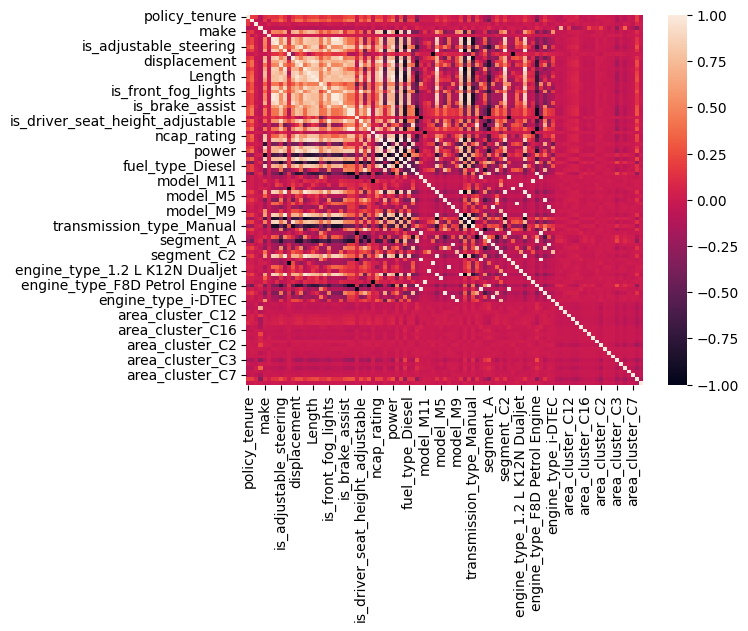

In [917]:
sns.heatmap(df.corr())

In [918]:
# from sklearn.utils import resample
# # Separate the majority and minority classes
# majority_class = df[df['is_claim'] == 0]
# minority_class = df[df['is_claim'] == 1]

# # Undersample the majority class
# undersampled_majority = resample(
#     majority_class,
#     replace=False,  # Set to False for undersampling
#     n_samples=len(minority_class) * 2,  # Desired number of records in the majority class
#     random_state=42  # Set a random seed for reproducibility
# )

# # Combine the undersampled majority class with the minority class
# df = pd.concat([undersampled_majority, minority_class])

In [919]:
x = df.drop('is_claim',axis=1)
y = df['is_claim']

In [920]:
x

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
19561,0.137155,0.01,0.759615,27003,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9890,0.580344,0.11,0.355769,8794,3,6,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4907,1.048409,0.04,0.644231,6108,1,6,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
27686,0.081415,0.02,0.346154,27003,1,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15047,1.144764,0.11,0.432692,8794,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29959,0.522648,0.00,0.432692,6112,1,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29971,0.998589,0.08,0.528846,27003,3,6,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
30023,0.795711,0.11,0.336538,34791,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
30048,1.173214,0.04,0.346154,16733,1,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [921]:
df['is_claim'].value_counts()

is_claim
0    3856
1    1928
Name: count, dtype: int64

In [922]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=21)
# x_resampled, y_resampled = rus.fit_resample(x, y)

In [923]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6, random_state=21)


In [924]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=21)
# x_resampled, y_resampled = rus.fit_resample(x_train, y_train)


In [925]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegression

    # create a model
    model = LogisticRegression()

    # train the model
    model.fit(x_train, y_train)

    return model

In [926]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier

    # create a model
    model = KNeighborsClassifier(n_neighbors=100)

    # train the model
    model.fit(x_train, y_train)

    return model

In [927]:
def build_svm_model():
    from sklearn.svm import SVC

    # create a model
    model = SVC()

    # train the model
    model.fit(x_train, y_train)

    return model

In [928]:

# get lg model
model_lg = build_lg_model()

# get KNN model
model_knn = build_knn_model()

# get SVM model
model_svm = build_svm_model()

In [929]:
def evaluate_model(model):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)    

    # get confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # print accuracy
    # print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}%")
    # print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}%")
    # print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}%")
    # print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}%")
    print(f"C.R = {classification_report(y_true, y_pred)}")

In [930]:
evaluate_model(model_lg)

[[1551    0]
 [ 763    0]]
C.R =               precision    recall  f1-score   support

           0       0.67      1.00      0.80      1551
           1       0.00      0.00      0.00       763

    accuracy                           0.67      2314
   macro avg       0.34      0.50      0.40      2314
weighted avg       0.45      0.67      0.54      2314



/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [931]:
evaluate_model(model_knn)

[[1551    0]
 [ 763    0]]
C.R =               precision    recall  f1-score   support

           0       0.67      1.00      0.80      1551
           1       0.00      0.00      0.00       763

    accuracy                           0.67      2314
   macro avg       0.34      0.50      0.40      2314
weighted avg       0.45      0.67      0.54      2314



/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [934]:
evaluate_model(model_svm)

[[1551    0]
 [ 763    0]]
C.R =               precision    recall  f1-score   support

           0       0.67      1.00      0.80      1551
           1       0.00      0.00      0.00       763

    accuracy                           0.67      2314
   macro avg       0.34      0.50      0.40      2314
weighted avg       0.45      0.67      0.54      2314



/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## pickle formate

In [936]:
import pickle
model_file = open("insurance_prediction.pkl",'wb')
pickle.dump(model_svm,model_file)
model_file.close()